## Pyber - RedaB

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
# Importing files
city_data = "city_data.csv"
ride_data = "ride_data.csv"


In [4]:
# Reading City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)


In [5]:
# Combining the data into a single dataset
# data will be merged on city since city is a common column in both dataframes
combined_df = pd.merge(ride_df, city_df, how='left', on='city')
combined_df = combined_df.sort_index()

# Displaying the data table for preview
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtaining the x and y coordinates for each of the three city types:

# Filteing dataframe for city types
rural_df = combined_df[combined_df["type"] == "Rural"]
suburban_df = combined_df[combined_df["type"] == "Suburban"]
urban_df = combined_df[combined_df["type"] == "Urban"]

# Claculating avg fare, ride count and driver count

# RURAL: 
rural_avg_fare = rural_df.groupby("city").mean()["fare"]
rural_driver_count = rural_df.groupby("city").mean()["driver_count"]
rural_ride_count = rural_df.groupby("city").count()["ride_id"]

# SUBURBAN: 
suburban_avg_fare = suburban_df.groupby("city").mean()["fare"]
suburban_driver_count = suburban_df.groupby("city").mean()["driver_count"]
suburban_ride_count = suburban_df.groupby("city").count()["ride_id"]

# URBAN: 
urban_avg_fare = urban_df.groupby("city").mean()["fare"]
urban_driver_count = urban_df.groupby("city").mean()["driver_count"]
urban_ride_count = urban_df.groupby("city").count()["ride_id"]



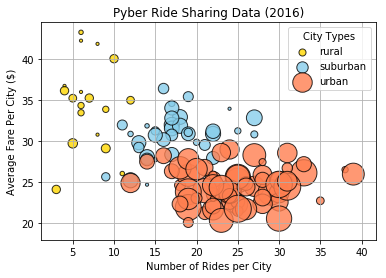

In [7]:
# Plots:

# RURAL
plt.scatter(x=rural_ride_count, y=rural_avg_fare, s=10*rural_driver_count, 
            c='gold', marker='o', alpha=0.8, 
            linewidths=1, edgecolors="black", label="rural")

# SUBURBAN
plt.scatter(x=suburban_ride_count, y=suburban_avg_fare, s=10*suburban_driver_count, 
            c='skyblue', marker='o', alpha=0.8, 
            linewidths=1, edgecolors="black", label="suburban")

# URBAN
plt.scatter(x=urban_ride_count, y=urban_avg_fare, s=10*urban_driver_count, 
            c='coral', marker='o', alpha=0.8, 
            linewidths=1, edgecolors="black", label="urban")


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare Per City ($)')
plt.legend(loc='best', title='City Types')
plt.grid()
plt.savefig('pyber_scatterplot.png')
plt.show()

## % of Total Fares by City Type

In [8]:
# Calculating fares average by city
fares_by_city_type = combined_df.groupby('type').sum()['fare']
fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

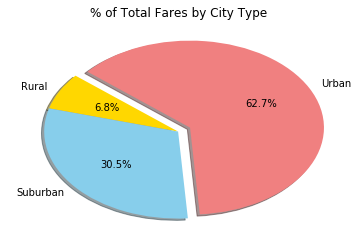

In [9]:
# Creating labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Defining values of each section of the pie chart
sizes = [4327, 19356, 39854]

# Defining colors of each section of the pie chart
colors = ["gold", "skyblue", "lightcoral"]

# Telling matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.savefig('pyber_% of Total Fares by City Type.png')
plt.show()

## % of Total Rides by City Type

In [10]:
# Calculating riders per city
riders_per_city_type= combined_df.groupby('type').count()['ride_id']
riders_per_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

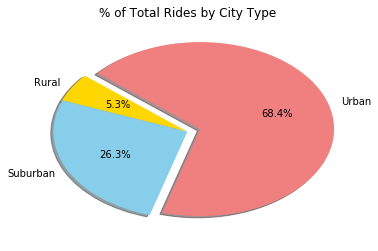

In [11]:
# Creating labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Defining the values of each section of the pie chart
sizes = [125, 625, 1625]

# Defining the colors of each section of the pie chart
colors = ["gold", "skyblue", "lightcoral"]

# Telling matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.savefig('pyber_% of Total Rides by City Type.png')
plt.show()



## % of Total Drivers by City Type

In [12]:
# Calculating drivers per city
drivers_per_city_type= city_df.groupby('type').sum()['driver_count']
drivers_per_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

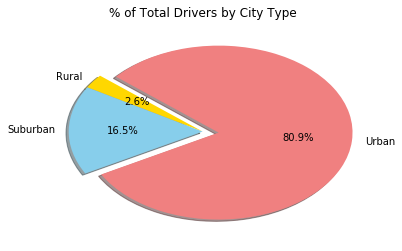

In [13]:
# Creating labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Defining he values of each section of the pie chart
sizes = [78, 490, 2405]

# Defining the colors of each section of the pie chart
colors = ["gold", "skyblue", "lightcoral"]

# Telling matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.12)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.savefig('pyber_% of Total Drivers by City Type.png')
plt.show()

## Observations:

1- The 3 pies indicate that there is a huge need for rides in urban cities. 

2- The bubble graph indicates that rural city types show a higher average fare per city despite the obervation above indicating urban cites having higher number of rides.

3- The above observation (2) could be a result of rural rides being longer diatance than the urban ones.